In [101]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import zipfile
import seaborn as sns
import pickle

In [102]:
# 1. Load Data
zip_path = r"C:\Users\USER\Downloads\wine+quality.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.printdir()
    #zip_ref.extractall("Datasets")

    with zipfile.ZipFile(zip_path) as z:
        with z.open('winequality-white.csv') as f:
            white_wine = pd.read_csv(f,sep = ";")
            white_wine.head()
            df = white_wine.copy()

File Name                                             Modified             Size
winequality-red.csv                            2023-05-22 22:24:00        84199
winequality-white.csv                          2023-05-22 22:24:00       264426
winequality.names                              2023-05-22 22:24:00         3305


In [103]:
# Initial Data Exploration
print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}")
df.info()
df.dtypes
df.duplicated().sum(axis=0)
df = df.drop_duplicates()
df.describe().T

Rows: 4,898
Columns: 12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,count,mean,std,min,25%,50%,75%,max
fixed acidity,3961.0,6.839346,0.866860,3.80000,6.30000,6.8000,7.30000,14.20000
volatile acidity,3961.0,0.280538,0.103437,0.08000,0.21000,0.2600,0.33000,1.10000
citric acid,3961.0,0.334332,0.122446,0.00000,0.27000,0.3200,0.39000,1.66000
residual sugar,3961.0,5.914819,4.861646,0.60000,1.60000,4.7000,8.90000,65.80000
chlorides,3961.0,0.045905,0.023103,0.00900,0.03500,0.0420,0.05000,0.34600
free sulfur dioxide,3961.0,34.889169,17.210021,2.00000,23.00000,33.0000,45.00000,289.00000
total sulfur dioxide,3961.0,137.193512,43.129065,9.00000,106.00000,133.0000,166.00000,440.00000
density,3961.0,0.993790,0.002905,0.98711,0.99162,0.9935,0.99571,1.03898
pH,3961.0,3.195458,0.151546,2.72000,3.09000,3.1800,3.29000,3.82000
sulphates,3961.0,0.490351,0.113523,0.22000,0.41000,0.4800,0.55000,1.08000


In [104]:
df.quality.unique()

array([6, 5, 7, 8, 4, 3, 9])

In [105]:


#map quality scores to labels
df['quality_label'] = df['quality'].map({9:"best", 8:"best", 7:"good", 6:"good", 5:"average", 4:"bad", 3: "bad"})

In [106]:
# Frequency + proportion
freq = df['quality_label'].value_counts()
prop = df['quality_label'].value_counts(normalize=True) * 100
summary = pd.DataFrame({'Count': freq, 'Percentage': prop.round(2)})
print(summary)

               Count  Percentage
quality_label                   
good            2477       62.53
average         1175       29.66
bad              173        4.37
best             136        3.43


In [107]:
df.drop(columns=['quality_label'], inplace=True)

# 2. Split Features / Target

X = df.drop("quality", axis=1)
y = df["quality"]

# 3. Train / Val / Test Split
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

# 4. Scale Features

scaler = MinMaxScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s = scaler.transform(X_val)
X_test_s = scaler.transform(X_test)


# ===== Define Models =====
models = {
        "Logistic Regression": LogisticRegression(),
        "Random Forest": RandomForestClassifier(random_state=42),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "KNN": KNeighborsClassifier(),
        "SVC": SVC(probability=True)
    }

C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


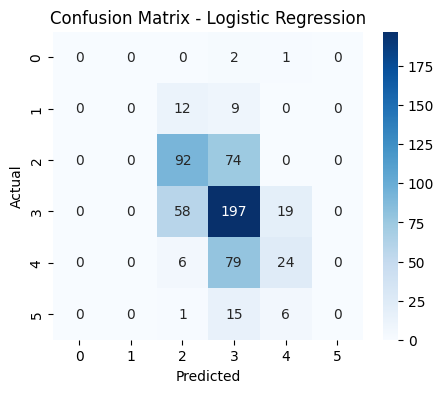


=== Logistic Regression ===
Accuracy:  0.526 | Precision: 0.258 | Recall: 0.249 | F1: 0.243


C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


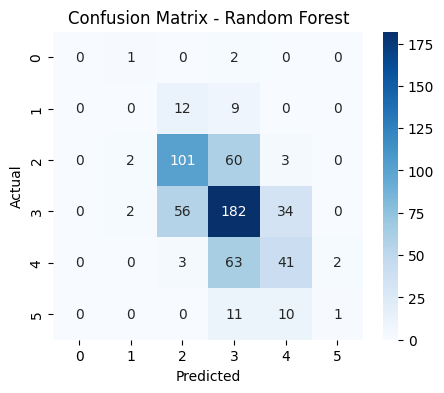


=== Random Forest ===
Accuracy:  0.546 | Precision: 0.324 | Recall: 0.282 | F1: 0.283


C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


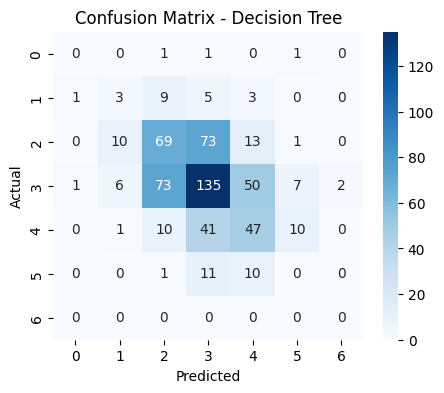


=== Decision Tree ===
Accuracy:  0.427 | Precision: 0.209 | Recall: 0.212 | F1: 0.210


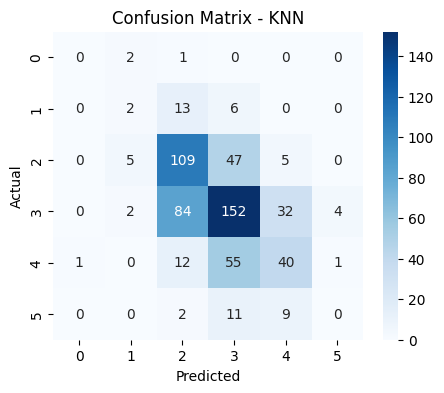


=== KNN ===
Accuracy:  0.509 | Precision: 0.284 | Recall: 0.279 | F1: 0.276


C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


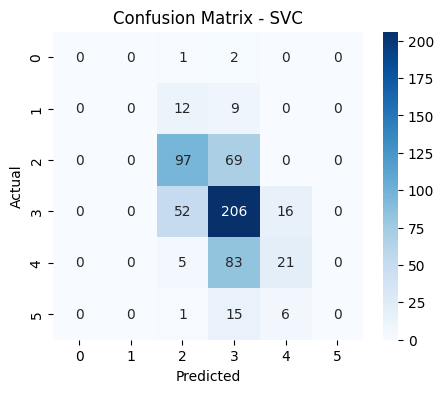


=== SVC ===
Accuracy:  0.545 | Precision: 0.267 | Recall: 0.255 | F1: 0.247
                 Model  Accuracy  Precision    Recall        F1  \
0  Logistic Regression  0.526050   0.258052  0.248896  0.242882   
1        Random Forest  0.546218   0.323838  0.282378  0.283256   
2        Decision Tree  0.426891   0.208992  0.211773  0.210138   
3                  KNN  0.509244   0.283505  0.278930  0.276060   
4                  SVC  0.544538   0.267035  0.254804  0.247216   

                                    Confusion_Matrix  
0  [[0, 0, 0, 2, 1, 0], [0, 0, 12, 9, 0, 0], [0, ...  
1  [[0, 1, 0, 2, 0, 0], [0, 0, 12, 9, 0, 0], [0, ...  
2  [[0, 0, 1, 1, 0, 1, 0], [1, 3, 9, 5, 3, 0, 0],...  
3  [[0, 2, 1, 0, 0, 0], [0, 2, 13, 6, 0, 0], [0, ...  
4  [[0, 0, 1, 2, 0, 0], [0, 0, 12, 9, 0, 0], [0, ...  


In [108]:
# 6. Train and Evaluate Each Model
results = []

for name, model in models.items():
    # Train on Train + Val
    model.fit(np.vstack((X_train_s, X_val_s)),
              np.concatenate((y_train, y_val)))

    y_pred = model.predict(X_test_s)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    cm = confusion_matrix(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1,
        "Confusion_Matrix": cm.tolist()
    })

    # Plot Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    print(f"\n=== {name} ===")
    print(f"Accuracy:  {acc:.3f} | Precision: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f}")


# Convert to DataFrame for nice display
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)


In [109]:
# 7. Pick Best Model (by F1)
results_df = pd.DataFrame(results)
best_model_name = results_df.sort_values(by="F1", ascending=False).iloc[0]["Model"]
best_model = models[best_model_name]

print(f"\nBEST MODEL BEFORE TUNING: {best_model_name}")


# 8. Define Hyperparameter Search Space
param_s = {}

if best_model_name == "Random Forest":
    param_s = {
        "n_estimators": [50, 100, 200, 300],
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    }
elif best_model_name == "Logistic Regression":
    param_s = {
        "C": np.logspace(-3, 3, 7),
        "penalty": ["l1", "l2", "elasticnet"],
        "solver": ["liblinear", "saga"]
    }
elif best_model_name == "Decision Tree":
    param_s = {
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    }
elif best_model_name == "KNN":
    param_s = {
        "n_neighbors": [3, 5, 7, 9, 11],
        "weights": ["uniform", "distance"],
        "p": [1, 2]
    }
elif best_model_name == "SVC":
    param_s = {
        "C": np.logspace(-2, 2, 5),
        "gamma": ["scale", "auto"],
        "kernel": ["linear", "rbf", "poly"]
    }


# 9. Randomized Search CV on Best Model
search = RandomizedSearchCV(
    estimator=best_model,
    param_distributions=param_s,
    n_iter=10,
    scoring="f1",
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

search.fit(X_train_s, y_train)

best_tuned_model = search.best_estimator_
print(f"\nBest Tuned Parameters for {best_model_name}:")
print(search.best_params_)



BEST MODEL BEFORE TUNING: Random Forest
Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(



Best Tuned Parameters for Random Forest:
{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 20}


C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Tuned Random Forest Results:
Accuracy:  0.546 | Precision: 0.273 | Recall: 0.268 | F1: 0.266


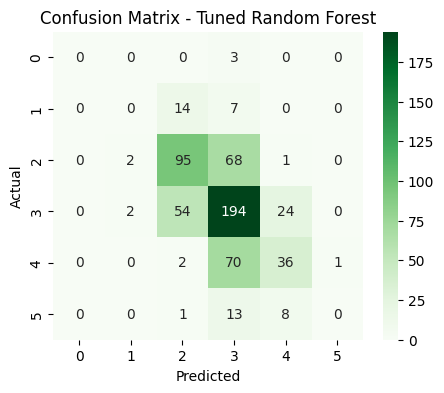


Final tuned model saved as model.pkl
Scaler saved as scaler.pkl


In [110]:

# 10. Evaluate Tuned Model on Test Data
y_pred_tuned = best_tuned_model.predict(X_test_s)

# detect if multiclass or binary automatically
average_type = 'binary' if len(set(y_test)) == 2 else 'macro'

acc = accuracy_score(y_test, y_pred_tuned)
prec = precision_score(y_test, y_pred_tuned, average=average_type)
rec = recall_score(y_test, y_pred_tuned, average=average_type)
f1 = f1_score(y_test, y_pred_tuned, average=average_type)
cm = confusion_matrix(y_test, y_pred_tuned)

print(f"\nTuned {best_model_name} Results:")
print(f"Accuracy:  {acc:.3f} | Precision: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f}")

# Confusion Matrix Plot
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title(f"Confusion Matrix - Tuned {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 11. Save Final Model + Scaler
with open("model.pkl", "wb") as f:
    pickle.dump(best_tuned_model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("\nFinal tuned model saved as model.pkl")
print("Scaler saved as scaler.pkl")
